<a href="https://colab.research.google.com/github/AbinReji07/human_personality/blob/main/human_personality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv("/content/personality_dataset.csv")
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,3.0,Yes,2.0,0.0,Introvert


In [2]:
df.shape

(2900, 8)

In [3]:
df.isna().sum()

,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0
Personality,0


In [4]:
df.dtypes

,0
Time_spent_Alone,float64
Stage_fear,object
Social_event_attendance,float64
Going_outside,float64
Drained_after_socializing,object
Friends_circle_size,float64
Post_frequency,float64
Personality,object


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Stage_fear"]=le.fit_transform(df["Stage_fear"])
df["Drained_after_socializing"]=le.fit_transform(df["Drained_after_socializing"])
df["Personality"]=le.fit_transform(df["Personality"])
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,9.0,1,0.0,0.0,1,0.0,3.0,1
2,9.0,1,1.0,2.0,1,5.0,2.0,1
3,0.0,0,6.0,7.0,0,14.0,8.0,0
4,3.0,0,9.0,4.0,0,8.0,5.0,0


In [6]:
x=df.iloc[:,:-1]
x

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,4.0,0,4.0,6.0,0,13.0,5.0
1,9.0,1,0.0,0.0,1,0.0,3.0
2,9.0,1,1.0,2.0,1,5.0,2.0
3,0.0,0,6.0,7.0,0,14.0,8.0
4,3.0,0,9.0,4.0,0,8.0,5.0
...,...,...,...,...,...,...,...
2895,3.0,0,7.0,6.0,0,6.0,6.0
2896,3.0,0,8.0,3.0,0,14.0,9.0
2897,4.0,1,1.0,1.0,1,4.0,0.0
2898,11.0,1,1.0,3.0,1,2.0,0.0


In [7]:
y=df.iloc[:,-1]
y

,Personality
0,0
1,1
2,1
3,0
4,0
...,...
2895,0
2896,0
2897,1
2898,1


In [8]:
y.value_counts()

,count
Personality,
0,1491
1,1409


In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-0.14701445, -0.97278401,  0.01275908, ..., -0.97077178,
         1.59067969,  0.49610435],
       [ 1.30622592,  1.02797743, -1.37994399, ...,  1.03010823,
        -1.48143661, -0.19519859],
       [ 1.30622592,  1.02797743, -1.03176822, ...,  1.03010823,
        -0.29985342, -0.54085006],
       ...,
       [-0.14701445,  1.02797743, -1.03176822, ...,  1.03010823,
        -0.53617006, -1.23215301],
       [ 1.88752207,  1.02797743, -1.03176822, ...,  1.03010823,
        -1.00880333, -1.23215301],
       [-0.43766252, -0.97278401,  0.70911062, ..., -0.97077178,
        -0.06353678,  1.87871024]])

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=1)

In [11]:
x_train

array([[ 0.72492977,  1.02797743, -0.33541668, ..., -0.97077178,
        -1.24511997, -0.88650153],
       [ 1.88752207,  1.02797743, -1.03176822, ...,  1.03010823,
        -1.00880333, -1.23215301],
       [ 1.01557785,  1.02797743, -0.68359245, ...,  1.03010823,
        -0.53617006, -1.23215301],
       ...,
       [-1.01895867, -0.97278401,  0.36093485, ..., -0.97077178,
         0.4090965 ,  0.84175582],
       [-0.14701445,  1.02797743, -1.37994399, ...,  1.03010823,
        -1.00880333,  0.        ],
       [ 1.01557785,  1.02797743, -0.33541668, ...,  1.03010823,
        -0.53617006, -1.23215301]])

In [12]:
y_train

,Personality
2812,1
2898,1
1292,1
2060,1
1688,1
...,...
2763,0
905,0
1096,0
235,1


In [13]:
x_test

array([[-0.43766252, -0.97278401,  0.36093485, ..., -0.97077178,
        -0.06353678,  0.84175582],
       [-1.01895867, -0.97278401,  1.75363792, ..., -0.97077178,
         0.88172977,  1.87871024],
       [ 1.30622592,  1.02797743, -0.68359245, ...,  1.03010823,
        -0.77248669, -0.54085006],
       ...,
       [ 1.88752207,  1.02797743, -1.03176822, ...,  1.03010823,
        -1.00880333, -0.54085006],
       [-1.30960674, -0.97278401,  1.05728639, ..., -0.97077178,
         1.11804641,  1.87871024],
       [ 1.01557785,  1.02797743, -1.37994399, ...,  1.03010823,
        -0.53617006, -1.23215301]])

In [14]:
y_test

,Personality
1271,0
2097,0
2121,1
1381,0
1593,0
...,...
508,1
2739,1
1719,1
1855,0


In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
from sklearn.svm import SVC
sv=SVC()
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [16]:
from sklearn.metrics import classification_report

In [17]:
lst=[knn,nb,lr,dt,sv,rf]
for i in lst:
  print("-----",i,"-----")
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print(classification_report(y_test,y_pred))

----- KNeighborsClassifier() -----
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       467
           1       0.90      0.94      0.92       403

    accuracy                           0.92       870
   macro avg       0.92      0.92      0.92       870
weighted avg       0.92      0.92      0.92       870

----- GaussianNB() -----
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       467
           1       0.90      0.95      0.92       403

    accuracy                           0.93       870
   macro avg       0.93      0.93      0.93       870
weighted avg       0.93      0.93      0.93       870

----- LogisticRegression() -----
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       467
           1       0.90      0.92      0.91       403

    accuracy                           0.91       870
   macro avg       0.91      0.92  

In [18]:
from sklearn.model_selection import GridSearchCV
p={"n_estimators":[10,20,30,40,50],"criterion":["gini","entropy","log_loss"],"max_depth":[1,3,5]}

gr=GridSearchCV(rf,p,cv=10,scoring="accuracy",)
gr.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 3, 5],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [19]:
print(gr.best_params_)

{'criterion': 'gini', 'max_depth': 1, 'n_estimators': 30}


In [20]:
rf1=RandomForestClassifier(n_estimators=50,criterion="entropy",max_depth=5)
rf1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=50)

In [21]:
y_pred1=rf1.predict(x_test)

In [22]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       467
           1       0.90      0.95      0.93       403

    accuracy                           0.93       870
   macro avg       0.93      0.93      0.93       870
weighted avg       0.93      0.93      0.93       870



In [23]:
import joblib
joblib.dump(rf,"model.joblib")
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

In [24]:
!pip install streamlit --quiet
import streamlit as st

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.4 MB/s eta 0:00:00


In [25]:
%%writefile app.py
import streamlit as st
import joblib
import pandas as pd
import os

# Page configuration
st.set_page_config(page_title="Personality Predictor", page_icon="🧠", layout="centered")

# Title and description
st.markdown("<h1 style='text-align: center; color: #4B8BBE;'>🧠 Human Personality Prediction</h1>", unsafe_allow_html=True)
st.markdown("<p style='text-align: center;'>Predict whether a person is an <b>Introvert</b> or <b>Extrovert</b> based on social behavior traits.</p>", unsafe_allow_html=True)
st.markdown("---")

# Load model and scaler
model_path = "model.joblib"
scaler_path = "scaler.joblib"

if not os.path.exists(model_path) or not os.path.exists(scaler_path):
    st.error("⚠️ Model or scaler file not found. Please ensure both 'model.joblib' and 'scaler.joblib' are in the same directory.")
    st.stop()

model = joblib.load(model_path)
scaler = joblib.load(scaler_path)

# Input fields
st.subheader("🔍 Enter Details:")
Time_spent_Alone = st.slider("🕒 Time Spent Alone (hrs)", 0, 15, 1)
Stage_fear = st.radio("🎤 Stage Fear", ["No", "Yes"])
Social_event_attendance = st.slider("🎉 Social Event Attendance (per week)", 0, 15, 1)
Going_outside = st.slider("🚶 Going Outside (times/week)", 0, 15, 1)
Drained_after_socializing = st.radio("😫 Drained After Socializing?", ["No", "Yes"])
Friends_circle_size = st.slider("👥 Friends Circle Size", 0, 20, 1)
Post_frequency = st.slider("📱 Social Media Post Frequency (per week)", 0, 15, 1)

# Convert categorical inputs
Stage_fear = 1 if Stage_fear == "Yes" else 0
Drained_after_socializing = 1 if Drained_after_socializing == "Yes" else 0

# Prepare input DataFrame
input_data = pd.DataFrame({
    "Time_spent_Alone": [Time_spent_Alone],
    "Stage_fear": [Stage_fear],
    "Social_event_attendance": [Social_event_attendance],
    "Going_outside": [Going_outside],
    "Drained_after_socializing": [Drained_after_socializing],
    "Friends_circle_size": [Friends_circle_size],
    "Post_frequency": [Post_frequency]
})

# Scale input data
input_scaled = scaler.transform(input_data)

# Predict
if st.button("🎯 Predict Personality"):
    try:
        prediction = model.predict(input_scaled)
        result = "🧍 The person is likely an **Introvert**." if prediction[0] == 1 else "🧑‍🤝‍🧑 The person is likely an **Extrovert**."

        st.markdown("---")
        st.markdown("<h3 style='color: #2E8B57;'>✅ Prediction Result</h3>", unsafe_allow_html=True)
        st.success(result)

        # Optional: Show input summary
        st.markdown("<h4>📊 Entered Data</h4>", unsafe_allow_html=True)
        st.dataframe(input_data)

    except Exception as e:
        st.error(f"❌ Prediction failed: {e}")


Writing app.py


In [26]:
!npm install -g localtunnel
!npm install -g npm@latest

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹
added 22 packages in 3s
⠸
⠸3 packages are looking for funding
⠸  run `npm fund` for details
⠸⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴
removed 9 packages, and changed 107 packages in 14s
⠴
⠴25 packages are looking for funding
⠴  run `npm fund` for details
⠴

In [27]:
!wget -q -O - ipv4.icanhazip.com

34.16.242.234


In [28]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼⠴⠦⠧
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.16.242.234:8501

your url is: https://true-pants-allow.loca.lt
  Stopping...
^C


In [29]:

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

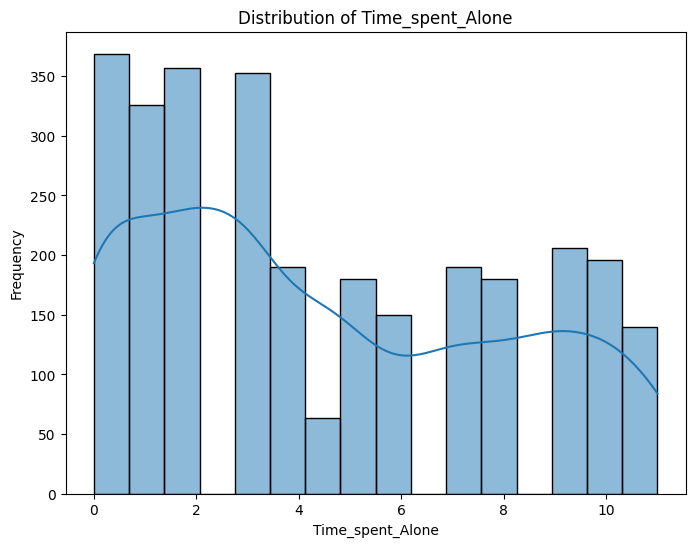

In [30]:


# Define the showplot function to create a distribution plot
def showplot(column_name):
  """
  Creates a distribution plot for the specified column in the DataFrame.

  Args:
    column_name: The name of the column to plot.
  """
  plt.figure(figsize=(8, 6)) # Optional: Adjust figure size
  sns.histplot(data=df, x=column_name, kde=True) # Use histplot for distribution
  plt.title(f'Distribution of {column_name}')
  plt.xlabel(column_name)
  plt.ylabel('Frequency')
  plt.show()

# Call the defined function
showplot("Time_spent_Alone")

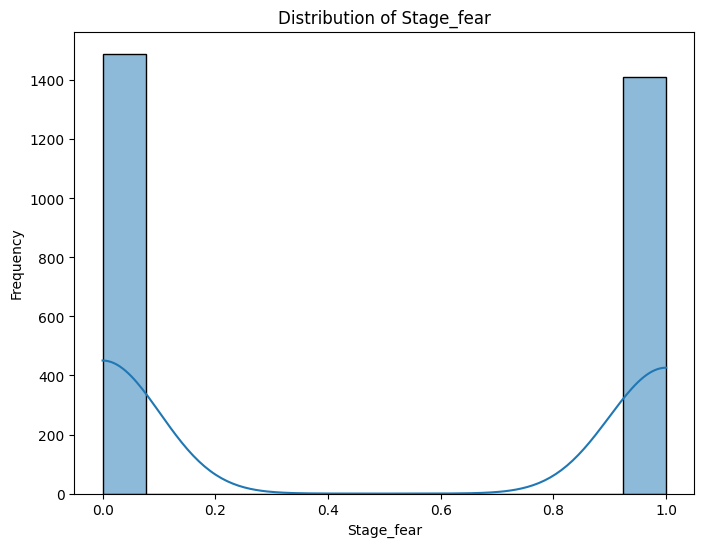

In [31]:

showplot('Stage_fear')

/tmp/ipython-input-32-4025821854.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Personality', palette='Set2', ax=axs[0, 0])
/tmp/ipython-input-32-4025821854.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Personality', y='Time_spent_Alone', palette='pastel', ax=axs[0, 1])
/tmp/ipython-input-32-4025821854.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Personality', y='Friends_circle_size', palette='coolwarm', ax=axs[1, 0])
/tmp/ipython-input-32-4025821854.py:30: FutureWarning: 

Passing `

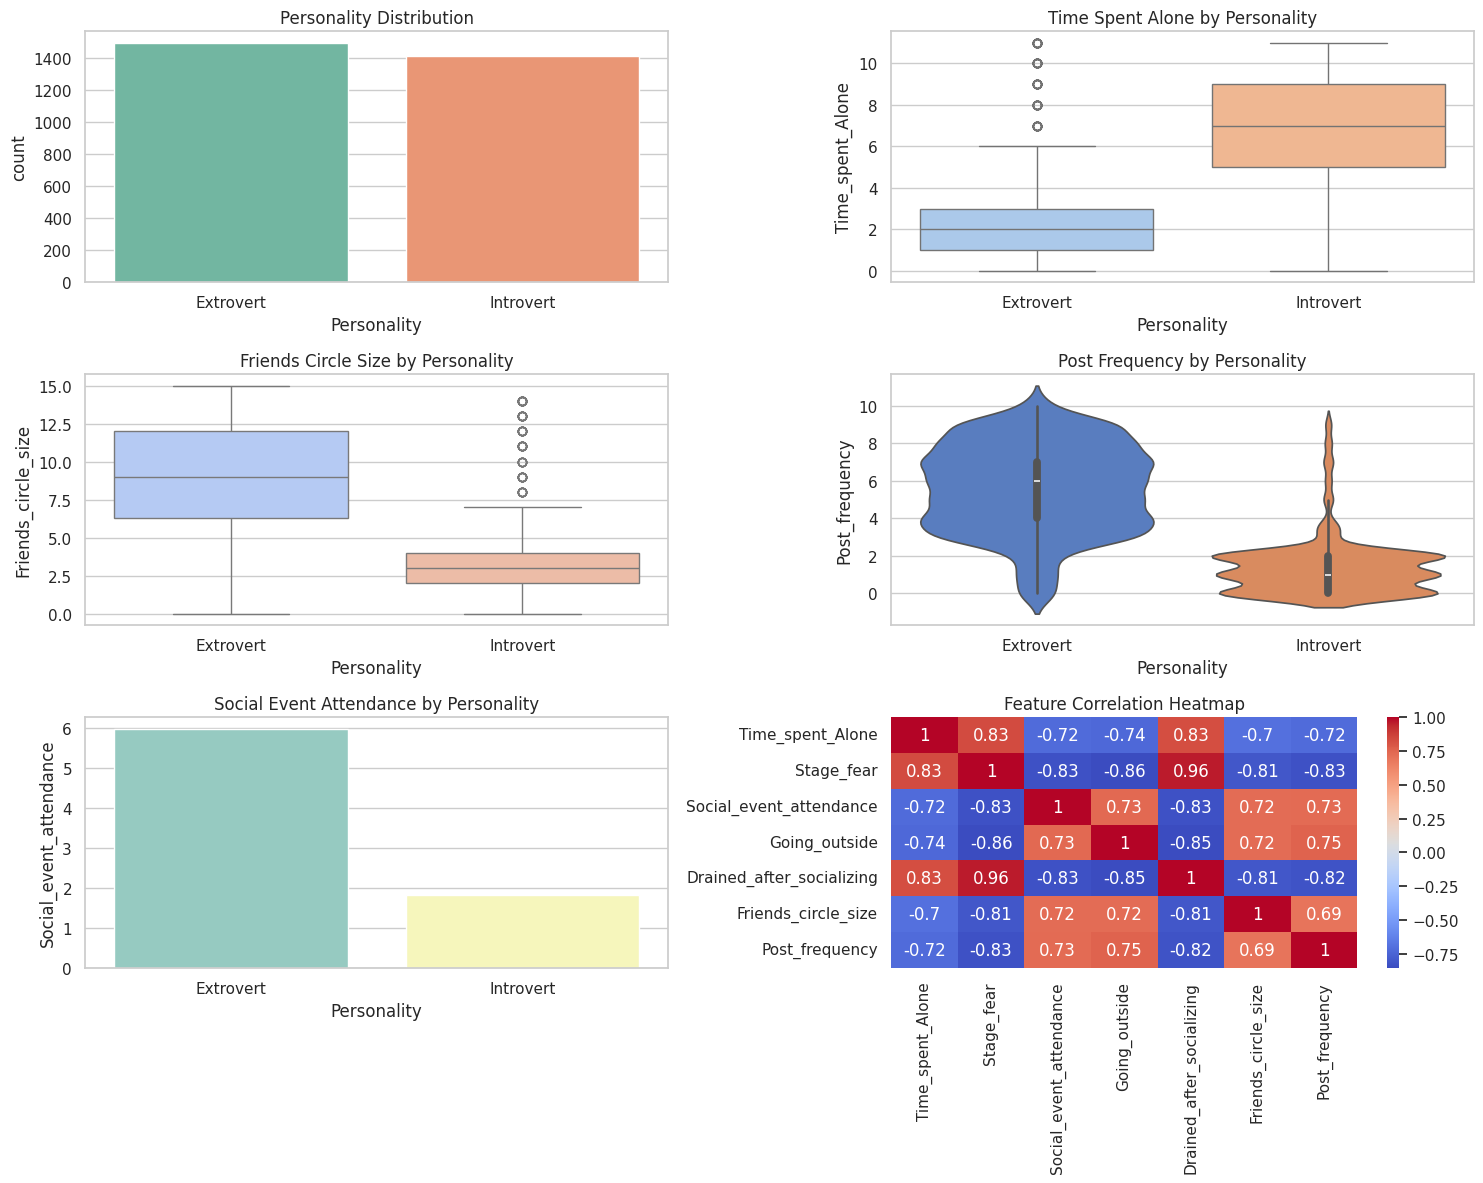

In [32]:

import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("personality_dataset.csv")

# Convert categorical features
df['Stage_fear'] = df['Stage_fear'].map({'Yes': 1, 'No': 0})
df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'Yes': 1, 'No': 0})

# Set plot style
sns.set(style="whitegrid")

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 12))

# 1. Count of Personality
sns.countplot(data=df, x='Personality', palette='Set2', ax=axs[0, 0])
axs[0, 0].set_title("Personality Distribution")

# 2. Time Spent Alone
sns.boxplot(data=df, x='Personality', y='Time_spent_Alone', palette='pastel', ax=axs[0, 1])
axs[0, 1].set_title("Time Spent Alone by Personality")

# 3. Friends Circle Size
sns.boxplot(data=df, x='Personality', y='Friends_circle_size', palette='coolwarm', ax=axs[1, 0])
axs[1, 0].set_title("Friends Circle Size by Personality")

# 4. Post Frequency
sns.violinplot(data=df, x='Personality', y='Post_frequency', palette='muted', ax=axs[1, 1])
axs[1, 1].set_title("Post Frequency by Personality")

# 5. Social Event Attendance
sns.barplot(data=df, x='Personality', y='Social_event_attendance', ci=None, palette='Set3', ax=axs[2, 0])
axs[2, 0].set_title("Social Event Attendance by Personality")

# 6. Correlation Heatmap
corr = df.drop(columns=['Personality']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axs[2, 1])
axs[2, 1].set_title("Feature Correlation Heatmap")

plt.tight_layout()
plt.show()
